In [147]:
import time
import matplotlib.pyplot as plt

# Applications of BSTs to Geometric Problems

Turns out that BSTs are great for solving problems relating to geometry.

For example, finding the number of points in a plane contained with a search rectangle:

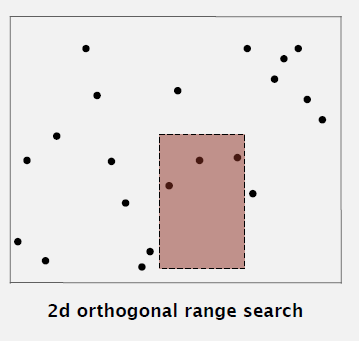

In [144]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.count = 1
        
    def __repr__(self):
        return f"({self.key}, {self.value})"
        
        
class BST:
    def __init__(self):
        self.root = None
        
    def put(self, key, value):
        self.root = self._put(self.root, key, value)
    
    def _put(self, node, key, value):
        if not node:
            return Node(key, value)
        
        if key > node.key:
            node.right = self._put(node.right, key, value)
        elif key < node.key:
            node.left = self._put(node.left, key, value)
        elif key == node.key:
            node.value = value
        node.count = 1 + self._size(node.left) + self._size(node.right)
        return node
    
    def get(self, key):
        if not self.root:
            return
        node = self.root
        while node:
            if key == node.key:
                return node
            elif key > node.key:
                node = node.right
            elif key < node.key:
                node = node.left
        return
    
    def contains(self, key):
        if self.get(key) is not None:
            return True
        return False
    
    def get_max(self, node):
        while node.right:
            node = node.right
        return node
    
    def get_min(self, node):
        while node.left:
            node = node.left
        return node
    
    def size(self):
        """Returns the size of the entire tree."""
        return self._size(self.root)
    
    def _size(self, node):
        """Returns the number of nodes in the subtree rooted at a node."""
        if not node:
            return 0
        else:
            return node.count
        
    def rank(self, key):
        return self._rank(key, self.root)
        
    def _rank(self, key, node):
        """Returns the number of keys less than key k."""
        if not node:
            return 0
        if key == node.key:
            return self._size(node.left)
        elif key < node.key:
            return self._rank(key, node.left)
        elif key > node.key:
            return 1 + self._size(node.left) + self._rank(key, node.right)
        
    def range_count(self, lo, hi):
        """Gets a count of keys between lo and hi."""
        if self.contains(hi):
            return self.rank(hi) - self.rank(lo) + 1
        else:
            return self.rank(hi) - self.rank(lo)
        
    def range_search(self, lo, hi):
        """Returns all keys between lo and hi."""
        return self._range_search(self.root, lo, hi)
        
    def _range_search(self, node, lo, hi):
        nodes = []
        if node.key > lo and node.key < hi:
            nodes.extend([node])
        if node.key > lo and node.left:
            nodes.extend(self._range_search(node.left, lo, hi))
        if node.key < hi and node.right:
            nodes.extend(self._range_search(node.right, lo, hi))
        return nodes
    
    def delete_min(self):
        self.root = self._delete_min(self.root)
        return
    
    def _delete_min(self, node):
        if not node.left:
            return node.right
        node.left = self._delete_min(node.left)
        node.count = 1 + self._size(node.left) + self._size(node.right)
        return node
    
    def delete(self, key):
        self.root = self._delete(self.root, key)
        return
    
    def _delete(self, node, key):
        if not node:
            return
        if key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            if not node.right:
                return node.left
            elif not node.left:
                return node.right
            else:
                temp = node
                node = self.get_min(temp.right)
                node.right = self._delete_min(temp.right)
                node.left = temp.left
                
        node.count = 1 + self._size(node.left) + self._size(node.right)
        return node

In [146]:
t = BST()
t.put(0, 10)
t.put(1, 2)
t.put(4, 5)
t.put(3, 2)
t.put(10, 0)
t.range_search(0, 5)

[(1, 2), (4, 5), (3, 2)]

## 1d Range Search

Extension of the ordered symbol table.

Operations:
1. Insert key-value pair
2. Search for key k
3. Delete key k
4. Range search: find all keys between k1 and k2
5. Range count: get the nubmer of keys between k1 and k2

Application: database searches

Geometric interpretation: keys are points on a line

Implementation options:
1. Unordered array (fast insert, slow range search)
2. Ordered array (slow insert, binary search to to range search)
3. Binary search tree (fast insert, fast range search)

#### Range Count

Notice that the number of keys between any two keys will simply be the difference in rank between the two keys (plus one if the higher key is in the tree):

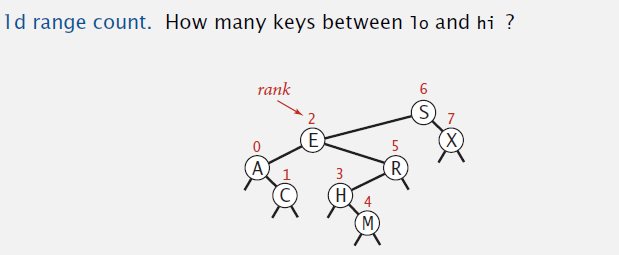

#### Range Search

1. Recursively find all keys in left subtree that fall in range
2. Check key in current node
2. Recursively find all keys in right subtree that fall in range

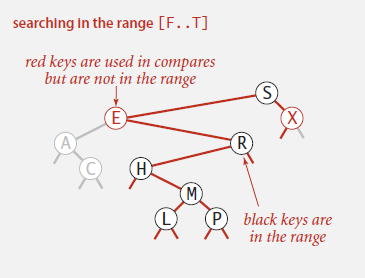

### Orthogonal line segment search - Sweep line algorithm

Given N horizontal and vertical line segments, find all intersections.

Brute force algorithm: for every line segment, check each other line for intersections.

Sweep line algorithm:
<strong>x-coordinates define events</strong>
1. Scanning from left to right, insert the y-coordinate of any discovered line into a BST when the x-coordinate of the line is first encountered.
2. Delete the y-coordinate of a line from the BST when you reach the x-coordinate defining the end of the line.
3. When you hit a vertical line segment (2 x-coordinates), do a 1d range search of the BST to determine if there are any intersecting horizontal lines. If the y-coordinate of a horizontal line is in the range defined by the y-coordinates of a vertical line, that's an intersection!

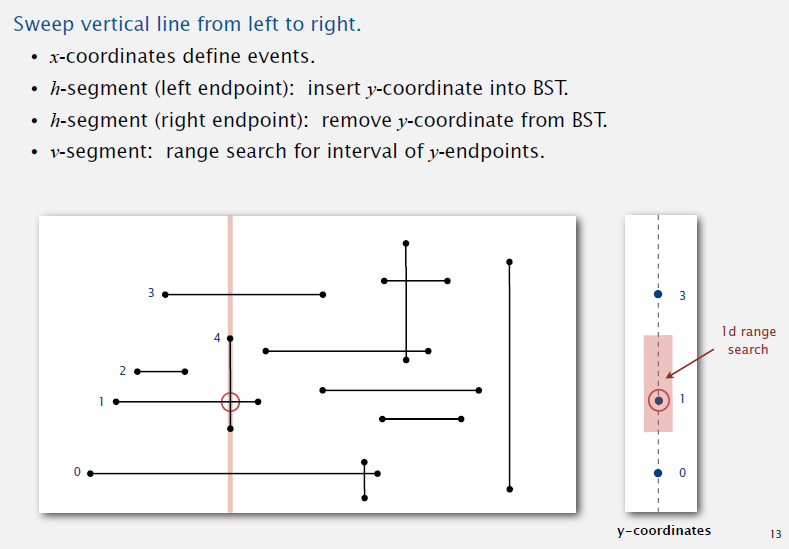

### Rectangle Intersection

* The 1d intersection algorithm has an important application in the rectangle intersection problem: Find all intersections among a set of N orthogonal rectangles
* The sweep-line algorithm can also be used here, except that the 1d range search algorithm is replaced with the 1d interval search algorithm
    * Again, x-coordinates on the left and right endpoints of the rectangle define events
    * Using a interval search tree (see Data Structures notebook), insert the interval representing the lower and upper y-coordinates of a rectangle into the interval search tree whenever you encounter a new x-coordinate (the left endpoint) and delete the interval when you encounter the right endpoint
    * When you encounter a vertical rectangle, use interval intersection search to see if the y-interval intersects with any existing y-intervals in the interval search tree
* Reduces the time required to solve this problem to linearithmic from quadratic!
    
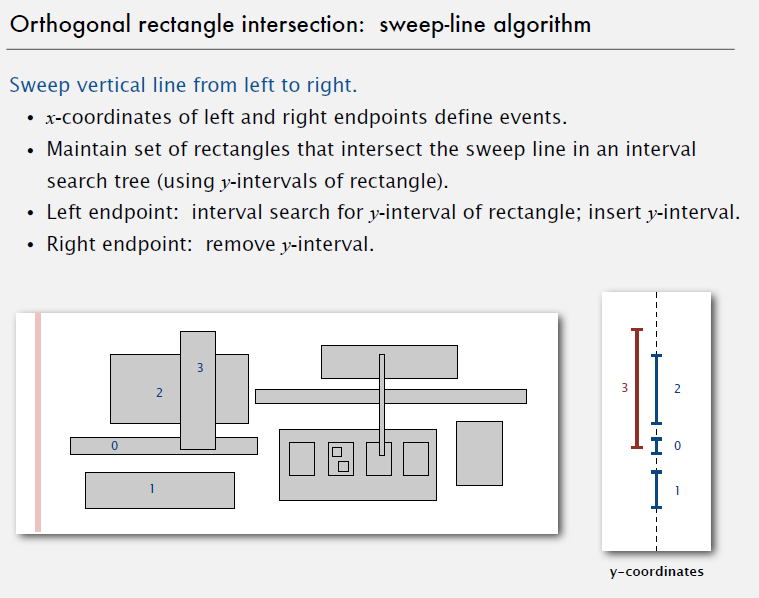

# Summary of Geometric Applications of BSTs

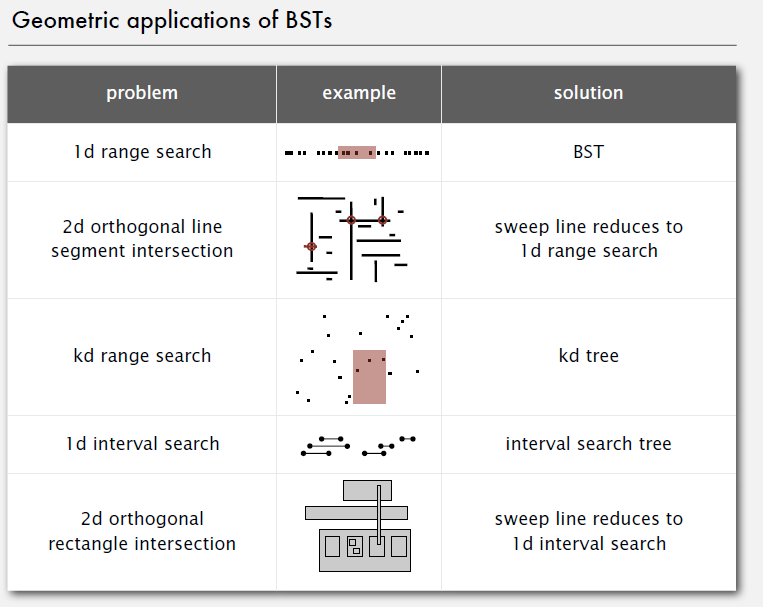